# COGS 108 - Final Project

## Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

- [X] YES - make available
- [ ] NO - keep private

## Overview

## Names

- Gadi Rosen
- Rujvi Mehendre
- Henry Lozada
- Joshua Paz

## Group Members IDs

- A16105613
- A14553468
- A15127559
- A13300845

## Research Question

"_How has the outbreak of COVID-19 affected food security in communities in the greater San Diego area?_"

## Background & Prior Work

#### Why is this project of interest to your group?
 The pandemic has claimed many lives, but its impact on the US goes beyond that. People of limited financial means have been disproportionately affected by the stay-at-home orders issued. In light of this, we believe it’s important to consider how the pandemic, and the stay-at-home orders issued, affect people’s livelihoods and access to food.

#### What background information led to your hypothesis?
 Certain communities in the greater San Diego area had suffered from food insecurity prior to the advent of this pandemic1. According to an article on Fortune magazine2, since the beginning of the pandemic, unemployment has skyrocketed from 4% to nearly 18%. Another article by Fortune3, published 04/09/2020, states that “The total weekly claims fell close to 1.4 million from last week's 6.6 million initial unemployment claims.” Furthermore, according to an article published on yahoo! finance4, “Economists had been expecting the report to show the ranks of jobless Americans increasing by 5.5 million.” Meanwhile, information made available by the USDA5 indicates that food production has been decreasing as a result of the pandemic. Consequently, food banks are reporting an unprecedented increase in demand6, and the possibility of the US facing a food crisis is real.

#### Why is this important?
 We believe that this pandemic’s impact on the US goes beyond the lives it has claimed. The advent of the pandemic has resulted in stay-at-home orders which have increased the number of jobless Americans, limiting their financial resources and thus their ability to secure basic necessities, such as food. An analysis of the pandemic’s effect on the public’s access to food could result in a better understanding of the area’s food supply chain, which could be used by decision-makers and other relevant stakeholders to alleviate current shortages, and perhaps to prevent other shortages from occurring in the future.

#### What has already been done on this topic? What is already known?
 COVID-197 is a respiratory virus that is highly contagious and has infected well over 210 countries around the world, resulting in an on-going global pandemic. In order to curtail the spread of the disease, many governments have issued strict stay-at-home directives. These directives have resulted in the closure of businesses and increased unemployment.

 There have been studies and visualizations done in many countries worldwide highlighting spots where food insecurity is prevalent. These studies demonstrate that COVID-19 has only aggravated food insecurity, especially in countries where food insecurity was already prevalent.

#### References:
1. Food deserts and access to fresh food in low-income San Diego / by Emily Theresa Puhl
2. 22 million have lost their jobs over the past month—real unemployment rate likely nearing 18%
3. Real unemployment in the United States has likely hit 14.7%, the highest level since 1940
4. Jobless claims: Another 5.245 million Americans file for unemployment benefits
5. USDA - Quick Stats
6. A perfect storm: US facing hunger crisis as demand for food banks soars
7. COVID-19
#### Additional sources:
1. San Diego Hunger Coalition
2. UCSD Community Health
3. Foods Typically Purchased by Supplemental Nutrition Assistance Program (SNAP) Households
4. Food Security Information Network
5. Feeding San Diego
6. Neighborhood distribution Program
7. Food assistance during COVID-19 Pandemic
8. Greater Pittsburgh Community Foodbank - Our response to COVID-19
9. USDA - Coronavirus Disease
10. Nutritional Goals for Age-Sex Groups Based on Dietary Reference Intakes and Dietary Guidelines Recommendations

### Hypothesis:
The outbreak of COVID-19 has negatively impacted individuals’ access to food, disproportionately affecting the financially insecure and communities of color. These groups were already limited in their ability to provide for themselves and their families, and the pandemic has only made it more difficult for them to do so.

### Data:
1. San Diego Foodbank - Lbs of food distributed
2. SANDAG/SanGIS regional GIS data
2. SANDAG 2018 population estimates by Zip

### Setup

In [1]:
# Imports
%matplotlib inline
import fiona
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

import shapely.geometry as shp

import sklearn.neighbors as skn
import sklearn.metrics as skm

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 10

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'

In [26]:
filepath = "Census_Data/Census_ZIP.shp"
tempmap = gpd.read_file(filepath)

#pop = pd.read_excel("Household Population ZIP.xlsx")
pop = pd.read_excel("Population_Estimate.xlsx").groupby('ZIP')['POPULATION'].sum().to_frame()
sdmap= pd.merge(tempmap, pop, on='ZIP', how='left')
sdmap

,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,POPULATION
0,1,91901,Alpine,4.149899e+09,326021.908292,"POLYGON ((-12996038.867 3890080.229, -12995532...",17885
1,2,91902,Bonita,2.739094e+08,113257.374615,"POLYGON ((-13021233.214 3856660.495, -13021180...",17375
2,3,91905,Boulevard,2.735681e+09,241725.552214,"POLYGON ((-12938849.815 3862278.403, -12938452...",2014
3,4,91906,Campo,3.066759e+09,287410.325075,"POLYGON ((-12952777.843 3856161.110, -12952835...",3686
4,5,91910,Chula Vista,4.034374e+08,112587.791814,"POLYGON ((-13031455.246 3848954.228, -13031444...",82682
...,...,...,...,...,...,...,...
118,119,92173,San Ysidro,1.103674e+08,52066.797099,"POLYGON ((-13031628.853 3838249.686, -13031502...",27741
119,120,92182,San Diego,9.608105e+06,17525.597204,"POLYGON ((-13032564.287 3866041.974, -13032228...",2222
120,121,92259,Ocotillo,1.978752e+09,194340.478076,"POLYGON ((-12924552.762 3879237.154, -12924543...",0
121,122,92536,Aguanga,1.389177e+09,206176.033344,"POLYGON ((-12990268.688 3952174.653, -12989354...",491


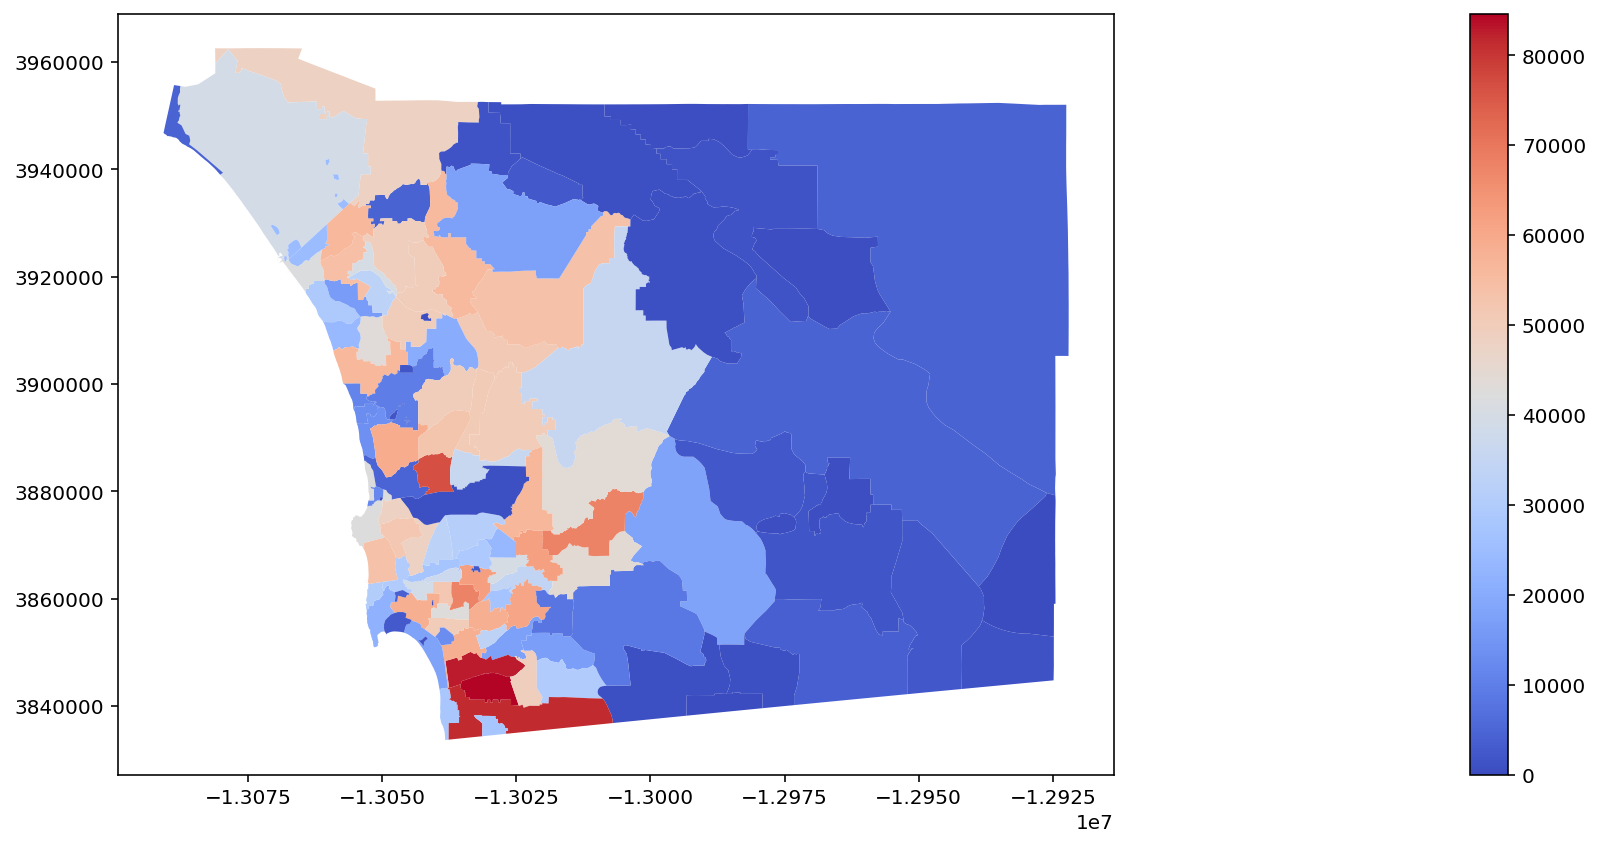

In [27]:
#Population by Zip code
fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
sdmap.plot(column='POPULATION', ax=ax, cmap='coolwarm', legend=True);

In [28]:
addresses = gpd.read_file('ADDRESS_APN.shp')

##### Note: Do we still need addresses? I think we won't end up using it.
Andy Gordon, a GIS analyst at SANDAG, San Diego region's primary public planning, transportation, and research agency, confirmed that the addresses data set does not contain all the addresses in San Diego county, nor does it contain P.O. Boxes.
For example, 555 Del Mar Heights, Del Mar, CA, which appears in the food bank data set, does not appear in the addresses data set.


In [30]:
#For example, this address, which will appear in the food bank data set, does not appear in the addresses data set.
addresses[(addresses['ADDRNAME'] == 'DEL MAR HEIGHTS') & (addresses['ADDRNMBR'] == 555.0)]

,ADDRNMBR,ADDRFRAC,ADDRPDIR,ADDRNAME,ADDRPOSTD,ADDRSFX,ADDRUNIT,ADDRJUR,ADDRZIP,ROADSEGID,...,X_COORD,Y_COORD,STATE,PLACEMENT_,COMMUNITY,ADDRESS_TY,PARCELID,USNG,ORIG_OID,geometry


Shelly Parks, Director of Programs for the San Diego Food Bank, was kind enough to forward us information about food distribution by lbs for the various zip codes in San Diego county. We were given information for Jan-Apr 2019, and Jan-Apr 2020.

In [31]:
#Read in all foodbank data
#2019
Jan2019 = pd.read_excel("San_Diego_Foodbank_Data/Jan 2019.xlsx")
Feb2019 = pd.read_excel("San_Diego_Foodbank_Data/Feb 2019.xlsx")
Mar2019 = pd.read_excel("San_Diego_Foodbank_Data/Mar 2019.xlsx")
Apr2019 = pd.read_excel("San_Diego_Foodbank_Data/Apr 2019.xlsx")
#2020
Jan2020 = pd.read_excel("San_Diego_Foodbank_Data/Jan 2020.xlsx")
Feb2020 = pd.read_excel("San_Diego_Foodbank_Data/Feb 2020.xlsx")
Mar2020 = pd.read_excel("San_Diego_Foodbank_Data/Mar 2020.xlsx")
Apr2020 = pd.read_excel("San_Diego_Foodbank_Data/Apr 2020.xlsx")

#Note: Number of foodbanks sampled varies from year to year and month to month.
#----------------------------------------------------------------------------------
    # Jan 2019: 452
    # Feb 2019: 387
    # Mar 2019: 431
    # Apr 2019: 418
    #--------------
    # Jan 2020: 486
    # Feb 2020: 331
    # Mar 2020: 481
    # Apr 2020: 454
#----------------------------------------------------------------------------------
# Suggestion: Consider only foodbanks that consistently appear throughout all dfs.

def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

food_banks = {}
data = [Jan2019, Jan2020, Feb2019, Feb2020, Mar2019, Mar2020, Apr2019, Apr2020]
for i in range(len(data)):
    for j, row in data[i].iterrows():
        if row['AGENCY #'] not in food_banks:
            if i > 0:
                continue
            food_banks[row['AGENCY #']] = { 'zip' : row['ZIP CODE'], 'months' : {} }
        food_banks[row['AGENCY #']]['months'][get_df_name(data[i])] = round(row['TOTAL LBS'])
        
#food_banks(map(lambda x: len(x['months']), food_banks))
food_banks = { k: v for k, v in food_banks.items() if len(v['months']) == len(data) }
food_banks

{'CFD-1152': {'zip': 91945.0,
  'months': {'Jan2019': 31993,
   'Jan2020': 19864,
   'Feb2019': 38819,
   'Feb2020': 27932,
   'Mar2019': 14831,
   'Mar2020': 39728,
   'Apr2019': 320,
   'Apr2020': 59282}},
 'CFD-1504': {'zip': 92025.0,
  'months': {'Jan2019': 3103,
   'Jan2020': 5874,
   'Feb2019': 3577,
   'Feb2020': 1840,
   'Mar2019': 4992,
   'Mar2020': 3641,
   'Apr2019': 10353,
   'Apr2020': 9927}},
 'CFD-151313': {'zip': 92028.0,
  'months': {'Jan2019': 15994,
   'Jan2020': 20104,
   'Feb2019': 15851,
   'Feb2020': 26117,
   'Mar2019': 14592,
   'Mar2020': 32234,
   'Apr2019': 15492,
   'Apr2020': 30520}},
 'CFD-151316': {'zip': 91910.0,
  'months': {'Jan2019': 17099,
   'Jan2020': 95468,
   'Feb2019': 13507,
   'Feb2020': 69137,
   'Mar2019': 3706,
   'Mar2020': 83683,
   'Apr2019': 12045,
   'Apr2020': 59063}},
 'CFD-151317': {'zip': 92103.0,
  'months': {'Jan2019': 13630,
   'Jan2020': 7729,
   'Feb2019': 11697,
   'Feb2020': 14227,
   'Mar2019': 8466,
   'Mar2020': 10381,


We elected to create a subset of the foodbank data which contains only agencies who have obvservation throughout all 8 sheets. This information was then organized into a dictionary of dictionaries for ease of use.

In [32]:
#1. Sum total food distributed by ZIP 
#2. for each zip, calculate food/pop
#3. Generate map
#4. interpret the results
food = {}
for month in data:
    month_name = get_df_name(month)
    for k, v in food_banks.items():
        if month_name not in food:
            food[month_name] = { v['zip']: 0 }
        elif v['zip'] not in food[month_name]:
            food[month_name][v['zip']] = 0
        food[month_name][v['zip']] += v['months'][month_name]      
food

df_jan2019 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Jan2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_jan2019 = df_jan2019.append(newrow, ignore_index=True)
df_jan2019

df_jan2020 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Jan2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_jan2020 = df_jan2020.append(newrow, ignore_index=True)
df_jan2020

df_feb2019 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Feb2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_feb2019 = df_feb2019.append(newrow, ignore_index=True)
df_feb2019

df_feb2020 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Feb2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_feb2020 = df_feb2020.append(newrow, ignore_index=True)
df_feb2020

df_mar2019 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Mar2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_mar2019 = df_mar2019.append(newrow, ignore_index=True)
df_mar2019

df_mar2020 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Mar2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_mar2020 = df_mar2020.append(newrow, ignore_index=True)
df_mar2020

df_apr2019 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Apr2019'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_apr2019 = df_apr2019.append(newrow, ignore_index=True)
df_apr2019

df_apr2020 = pd.DataFrame(columns=['ZIP', 'food_distributed'])
#for month_year, zip_dist in food.items():
for k,v in food['Apr2020'].items():
    newrow = {'ZIP':int(k), 'food_distributed':v}
    df_apr2020 = df_apr2020.append(newrow, ignore_index=True)

,ZIP,food_distributed
0,91945,439731
1,92025,87784
2,92028,63965
3,91910,182036
4,92103,36895
...,...,...
57,92008,6503
58,92130,120598
59,91934,7798
60,91963,21156


The data was organized into dataframes so it could then by merged with the population information.

In [47]:
adjusted_df_jan2019 = pd.merge(df_jan2019, pop, on='ZIP', how='left')
#adjusted_df_jan2019.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_jan2019[adjusted_df_jan2019['POPULATION']==0]
#adjusted_df_jan2019 = adjusted_df_jan2019[adjusted_df_jan2019['POPULATION'] != 0]
adjusted_df_jan2019 = adjusted_df_jan2019.assign(ratio = adjusted_df_jan2019['food_distributed'] / adjusted_df_jan2019['POPULATION'])
adjusted_df_jan2019['ratio'].mean()
#adjusted_df_jan2019['ratio'].median()

1.5960671385425877

In the month of January 2019, for the 62 observations that remain, approximately 1.59lbs of food were distributed per person.

adjusted_df_jan2019['ratio'].mean() == 1.59
adjusted_df_jan2019['ratio'].median() == 0.71

,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",10379,1084.0,9.574723
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",17417,974.0,17.881930
23,24,91978,Spring Valley,3.560355e+08,106617.068638,"POLYGON ((-13019534.560 3861461.255, -13019520...",53503,8115.0,6.593099
76,77,92086,Warner Springs,3.116867e+09,389903.891996,"POLYGON ((-12986377.426 3944407.546, -12984741...",7123,1477.0,4.822613
99,100,92121,San Diego,3.387185e+08,117747.270174,"POLYGON ((-13052938.066 3886694.600, -13052892...",35697,4796.0,7.443078


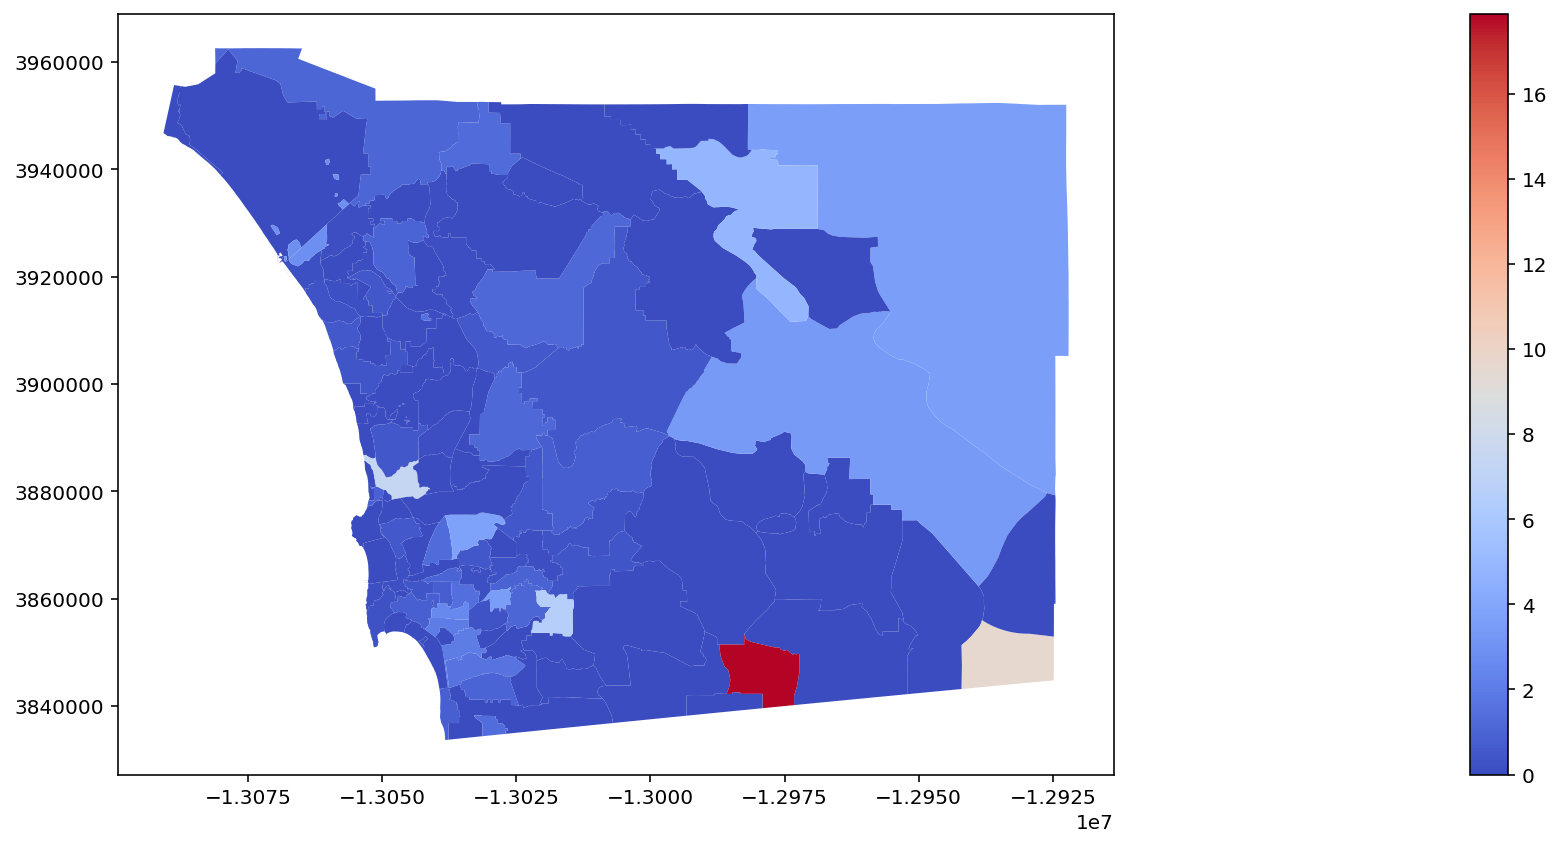

In [42]:
#JAN 2019
sdmapJan2019 = pd.merge(tempmap, adjusted_df_jan2019, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapJan2019['food_distributed'].fillna(0, inplace = True)
sdmapJan2019['POPULATION'].fillna(0, inplace = True)
sdmapJan2019['ratio'].fillna(0, inplace = True)

sdmapJan2019
sdmapJan2019.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapJan2019['ratio'].mean()
sdmapJan2019['ratio'].max()
sdmapJan2019[sdmapJan2019['ratio'] > 4]

The above map is a heat map of foot distribution by zip code for the month of January 2019. The map displays the ratio of food distributed by lbs over the total population in that area for each zip code for which consistent data exists.

Nan values were given a value of 0 so as to not create "holes" in the map.

As you can see, there are a few zip codes that stand out:

* Zip code 91934, associated with Jacumba. In 2017, Jacumba, CA had a population of 176 people with a median age of 72.4 and a median household income of $26,636. According to the 2010 United States Census[10] reported that Jacumba had a population of 561. The population density was 91.6 people per square mile (35.4/km²). The racial makeup of Jacumba was 389 (69.3%) White 322 (57.4%) non-Latinx White), 4 (0.7%) African American, 15 (2.7%) Native American, 6 (1.1%) Asian, 0 (0.0%) Pacific Islander, 114 (20.3%) from other races, and 33 (5.9%) from two or more races. Latinx of any race were 207 persons (36.9%).

* Zip code 91934, associated with the community of Potero. According to city-data.com, potrero has a high median income, but 23 percent of its residents live below the poverty line, indicating a great degree of income inequality. Potrero's closest neighbor is Tecate in Mexico, which might possibly account for the large amount of food being distributed there ars well.

* 91978	Spring Valley

* 92086	Warner Springs	

* 92121, which is adjacent to campus and has a significant Latinx population. The site of San Diego Food Bank.

We see that in zip codes adjacent to campus, and in rural areas along the Mexican border, food distribution appears to be signficantly higher than the observed average for this subset of zip codes. The area around campus would serve the student population, whether or not the reside on campus. It is possible that although median incomes appear to be fairly high in some of these communities, there might be income inequality, but this is unclear.



In [43]:
#FEB 2019
adjusted_df_feb2019 = pd.merge(df_feb2019, pop, on='ZIP', how='left')
#adjusted_df_feb2019.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_feb2019[adjusted_df_feb2019['POPULATION']==0]
#adjusted_df_feb2019 = adjusted_df_feb2019[adjusted_df_feb2019['POPULATION'] != 0]
adjusted_df_feb2019 = adjusted_df_feb2019.assign(ratio = adjusted_df_feb2019['food_distributed'] / adjusted_df_feb2019['POPULATION'])
adjusted_df_feb2019

,ZIP,food_distributed,POPULATION,ratio
0,91945,186772,26834,6.96027
1,92025,31988,51509,0.621018
2,92028,38456,48274,0.796619
3,91910,129906,82682,1.57115
4,92103,14323,38879,0.368399
...,...,...,...,...
57,92008,2720,29396,0.0925296
58,92130,16727,59436,0.281429
59,91934,5558,1084,5.12731
60,91963,8106,974,8.32238


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",5558,1084.0,5.127306
17,18,91945,Lemon Grove,1.075111e+08,63900.790408,"POLYGON ((-13026105.370 3861775.451, -13026124...",186772,26834.0,6.960274
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",8106,974.0,8.322382
23,24,91978,Spring Valley,3.560355e+08,106617.068638,"POLYGON ((-13019534.560 3861461.255, -13019520...",37650,8115.0,4.639556
42,43,92036,Julian,1.148784e+10,658532.621301,"POLYGON ((-12975898.170 3913541.738, -12973884...",17731,4346.0,4.079844
79,80,92096,San Marcos,1.352350e+07,17574.076583,"POLYGON ((-13041548.056 3913190.413, -13041547...",5052,566.0,8.925795


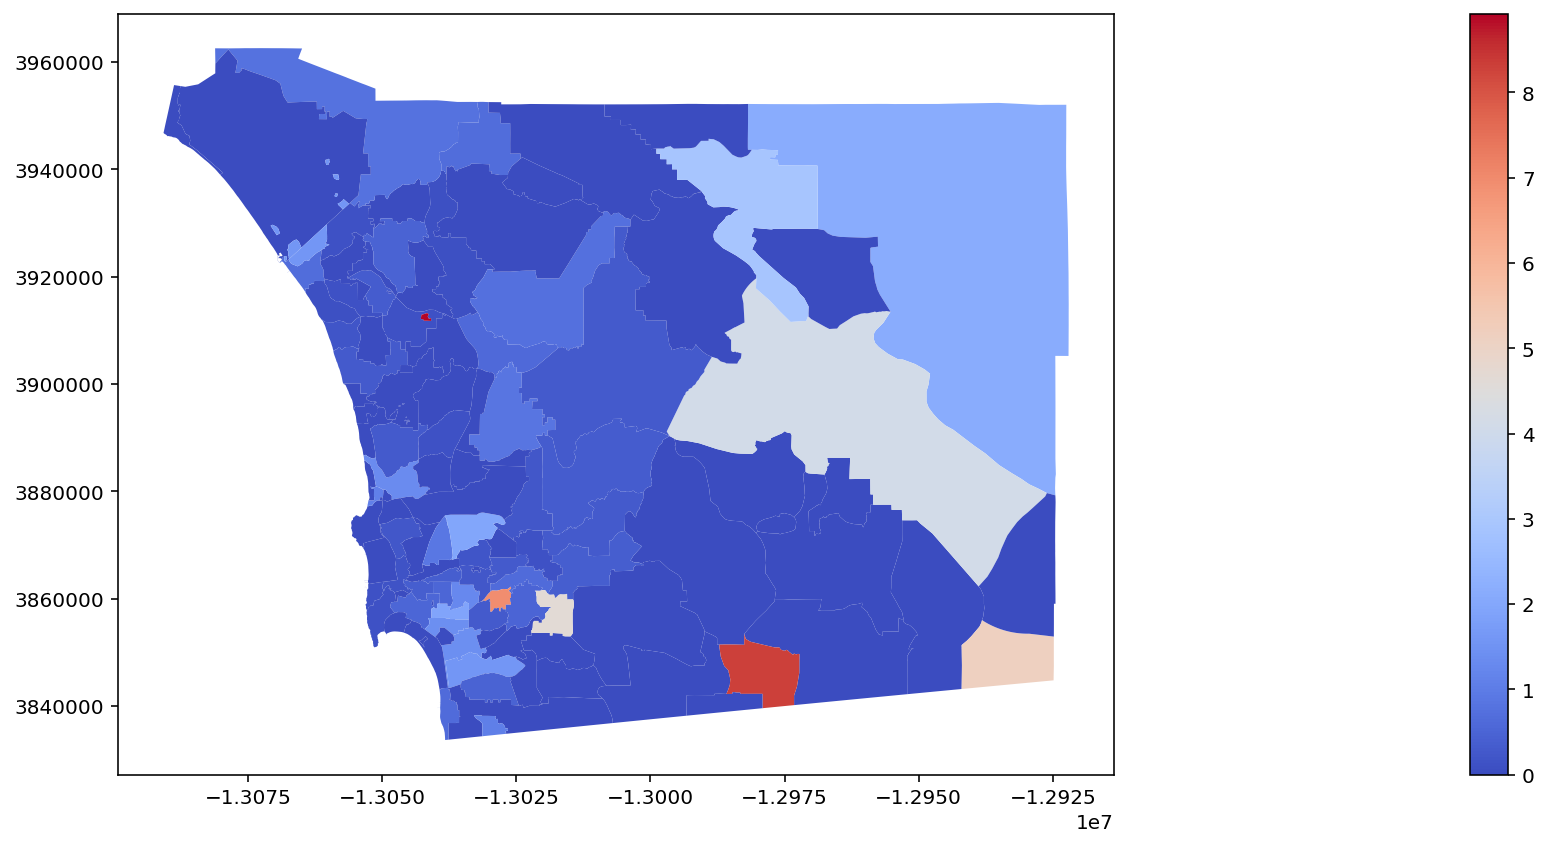

In [45]:
sdmapFeb2019 = pd.merge(tempmap, adjusted_df_feb2019, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapFeb2019['food_distributed'].fillna(0, inplace = True)
sdmapFeb2019['POPULATION'].fillna(0, inplace = True)
sdmapFeb2019['ratio'].fillna(0, inplace = True)

sdmapFeb2019
sdmapFeb2019.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapFeb2019['ratio'].mean()
sdmapFeb2019[sdmapFeb2019['ratio'] > 4]

A few additions - San Marcos and Julian appear. Distribution around campus, in Sorrento Valley, decreases somewhat.

In [49]:
#MAR 2019
adjusted_df_mar2019 = pd.merge(df_mar2019, pop, on='ZIP', how='left')
#adjusted_df_mar2019.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_mar2019[adjusted_df_mar2019['POPULATION']==0]
#adjusted_df_mar2019 = adjusted_df_mar2019[adjusted_df_mar2019['POPULATION'] != 0]
adjusted_df_mar2019 = adjusted_df_mar2019.assign(ratio = adjusted_df_mar2019['food_distributed'] / adjusted_df_mar2019['POPULATION'])
adjusted_df_mar2019

,ZIP,food_distributed,POPULATION,ratio
0,91945,168707,26834,6.28706
1,92025,35912,51509,0.697199
2,92028,33678,48274,0.697643
3,91910,104111,82682,1.25917
4,92103,10101,38879,0.259806
...,...,...,...,...
57,92008,3143,29396,0.106919
58,92130,11291,59436,0.189969
59,91934,6077,1084,5.60609
60,91963,7815,974,8.02361


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",6077,1084.0,5.606089
17,18,91945,Lemon Grove,1.075111e+08,63900.790408,"POLYGON ((-13026105.370 3861775.451, -13026124...",168707,26834.0,6.287061
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",7815,974.0,8.023614
23,24,91978,Spring Valley,3.560355e+08,106617.068638,"POLYGON ((-13019534.560 3861461.255, -13019520...",37221,8115.0,4.586691
79,80,92096,San Marcos,1.352350e+07,17574.076583,"POLYGON ((-13041548.056 3913190.413, -13041547...",5152,566.0,9.102473


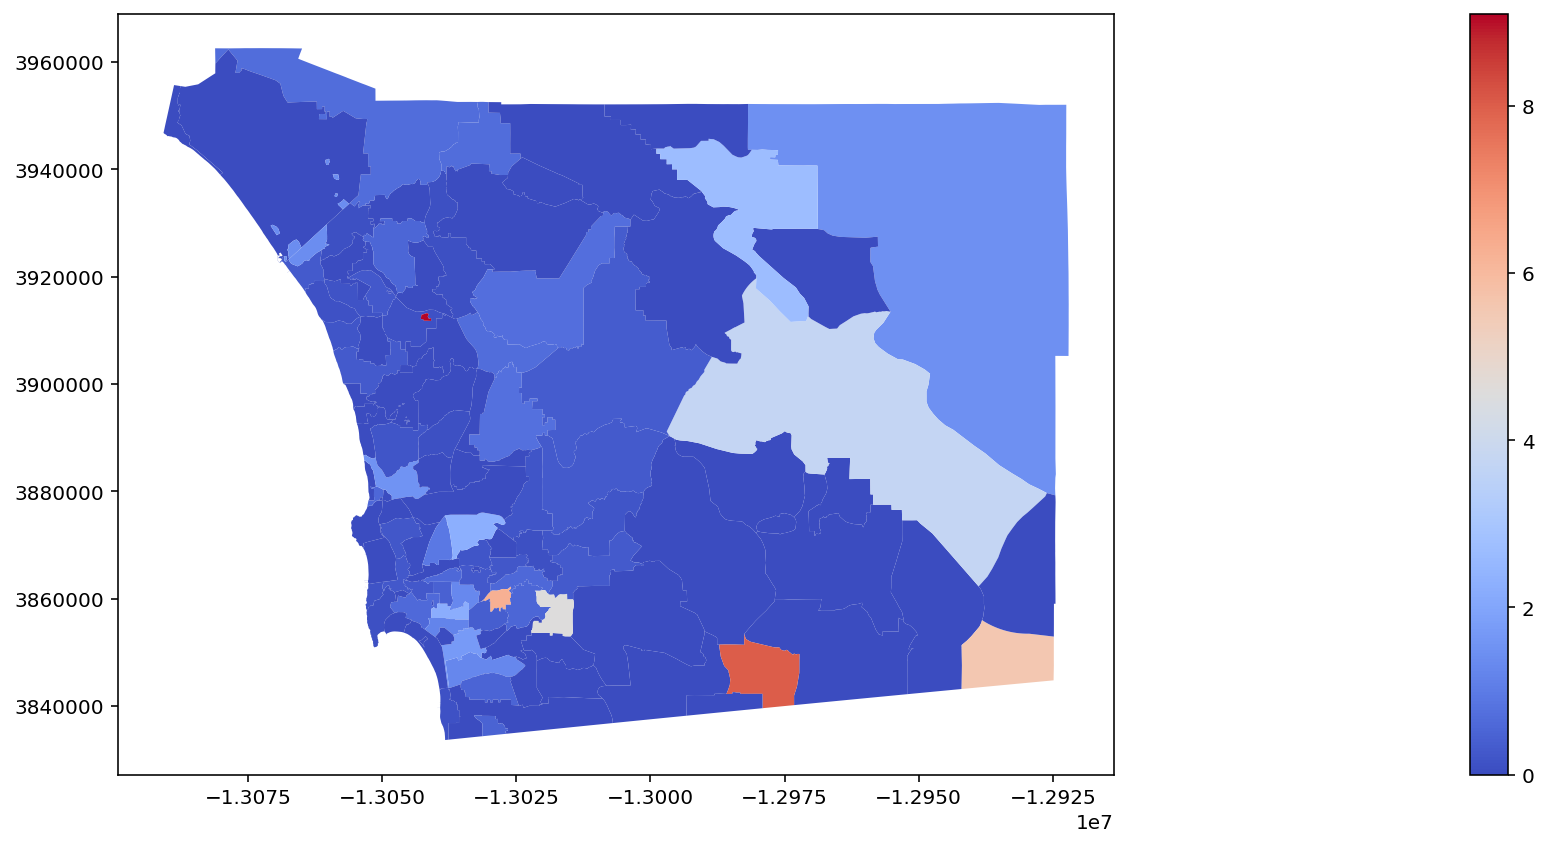

In [51]:
sdmapMar2019 = pd.merge(tempmap, adjusted_df_mar2019, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapMar2019['food_distributed'].fillna(0, inplace = True)
sdmapMar2019['POPULATION'].fillna(0, inplace = True)
sdmapMar2019['ratio'].fillna(0, inplace = True)

sdmapMar2019
sdmapMar2019.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapMar2019['ratio'].mean()
sdmapMar2019[sdmapMar2019['ratio'] > 4]

Distribution in Sorrento valley decreases, otherwise top distribution centers remain stable.

In [53]:
#APR 2019
adjusted_df_apr2019 = pd.merge(df_apr2019, pop, on='ZIP', how='left')
#adjusted_df_apr2019.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_apr2019[adjusted_df_apr2019['POPULATION']==0]
#adjusted_df_apr2019 = adjusted_df_apr2019[adjusted_df_apr2019['POPULATION'] != 0]
adjusted_df_apr2019 = adjusted_df_apr2019.assign(ratio = adjusted_df_apr2019['food_distributed'] / adjusted_df_apr2019['POPULATION'])
adjusted_df_apr2019

,ZIP,food_distributed,POPULATION,ratio
0,91945,20230,26834,0.753894
1,92025,22753,51509,0.441729
2,92028,32326,48274,0.669636
3,91910,113227,82682,1.36943
4,92103,16430,38879,0.422593
...,...,...,...,...
57,92008,22935,29396,0.780208
58,92130,2516,59436,0.0423312
59,91934,7594,1084,7.00554
60,91963,20714,974,21.2669


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",7594,1084.0,7.005535
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",20714,974.0,21.266940
79,80,92096,San Marcos,1.352350e+07,17574.076583,"POLYGON ((-13041548.056 3913190.413, -13041547...",3001,566.0,5.302120
99,100,92121,San Diego,3.387185e+08,117747.270174,"POLYGON ((-13052938.066 3886694.600, -13052892...",29117,4796.0,6.071101


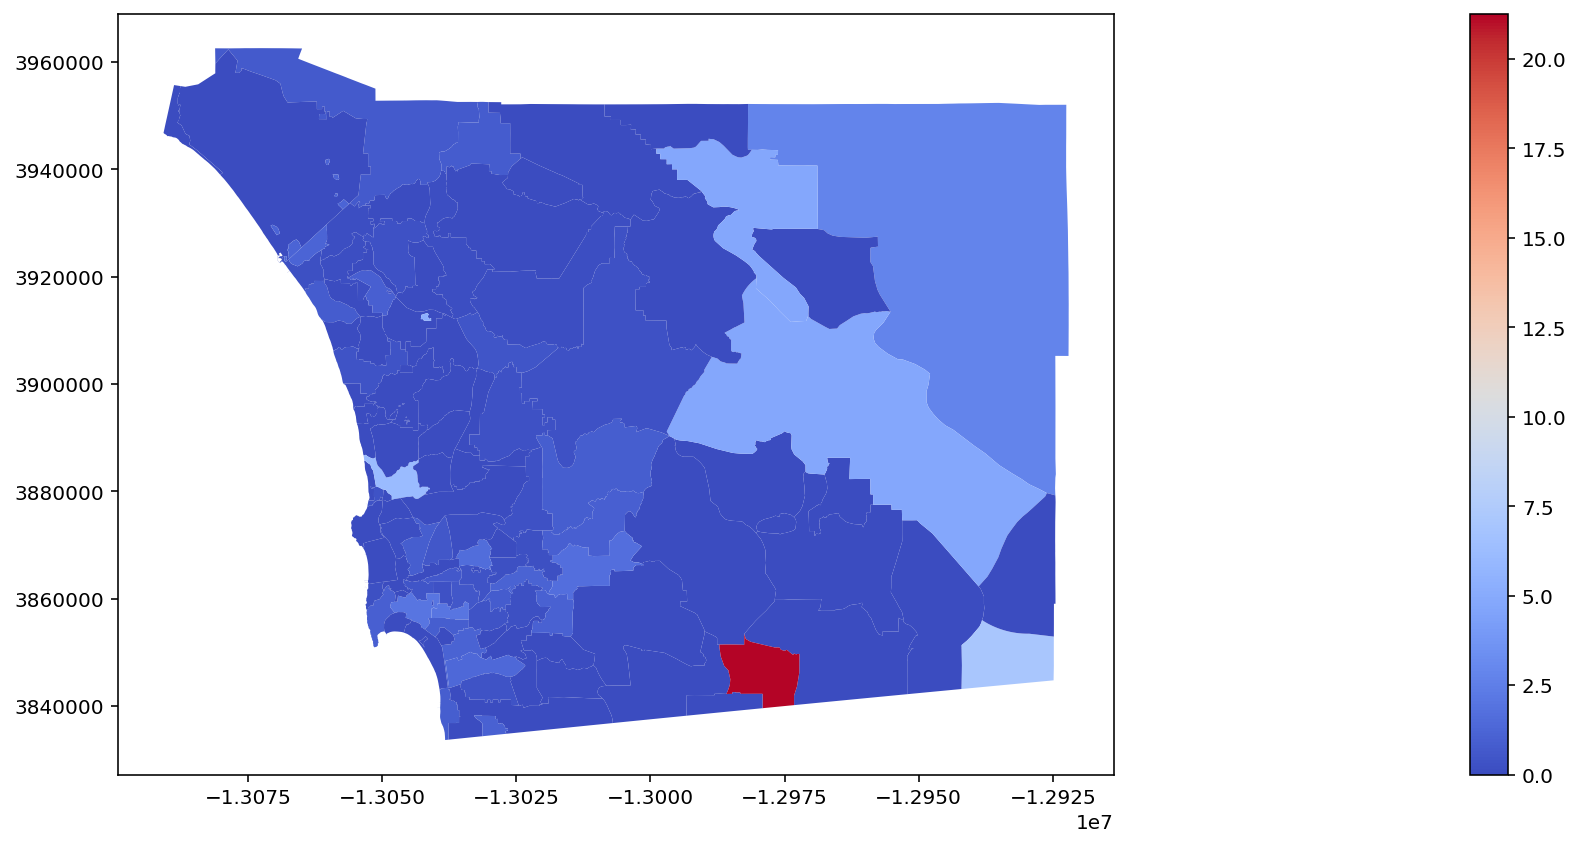

In [54]:
sdmapApr2019 = pd.merge(tempmap, adjusted_df_apr2019, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapApr2019['food_distributed'].fillna(0, inplace = True)
sdmapApr2019['POPULATION'].fillna(0, inplace = True)
sdmapApr2019['ratio'].fillna(0, inplace = True)

sdmapApr2019
sdmapApr2019.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapApr2019['ratio'].mean()
sdmapApr2019[sdmapApr2019['ratio'] > 5]


We notice a sharp increase in the amount of food distributed in Potrero. As mentioned, Potrero has a really high median income, however, and no significant industry, but its closest neighberhood is Tecate, which might explain why the amount of food being distributed there is so high.
It's also worth noting that Good Friday is a national holiday in Mexico, and Easter fell on Sunday, April 21 2019, perhaps explaining the increased distribution.

Sorrento valley reappears.

In [55]:
#2020

In [57]:
#JAN 2020
adjusted_df_jan2020 = pd.merge(df_jan2020, pop, on='ZIP', how='left')
#adjusted_df_jan2020.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_jan2020[adjusted_df_jan2020['POPULATION']==0]
#adjusted_df_jan2020 = adjusted_df_jan2020[adjusted_df_jan2020['POPULATION'] != 0]
adjusted_df_jan2020 = adjusted_df_jan2020.assign(ratio = adjusted_df_jan2020['food_distributed'] / adjusted_df_jan2020['POPULATION'])
adjusted_df_jan2020

,ZIP,food_distributed,POPULATION,ratio
0,91945,237054,26834,8.83409
1,92025,54624,51509,1.06047
2,92028,71300,48274,1.47699
3,91910,284953,82682,3.44637
4,92103,8869,38879,0.228118
...,...,...,...,...
57,92008,10702,29396,0.364063
58,92130,17805,59436,0.299566
59,91934,13382,1084,12.345
60,91963,24623,974,25.2803


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",13382,1084.0,12.345018
17,18,91945,Lemon Grove,1.075111e+08,63900.790408,"POLYGON ((-13026105.370 3861775.451, -13026124...",237054,26834.0,8.834091
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",24623,974.0,25.280287
23,24,91978,Spring Valley,3.560355e+08,106617.068638,"POLYGON ((-13019534.560 3861461.255, -13019520...",41629,8115.0,5.129883
42,43,92036,Julian,1.148784e+10,658532.621301,"POLYGON ((-12975898.170 3913541.738, -12973884...",18555,4346.0,4.269443
81,82,92102,San Diego,1.258094e+08,63075.690764,"POLYGON ((-13034474.579 3859470.788, -13034431...",262502,42951.0,6.111662
99,100,92121,San Diego,3.387185e+08,117747.270174,"POLYGON ((-13052938.066 3886694.600, -13052892...",206222,4796.0,42.998749


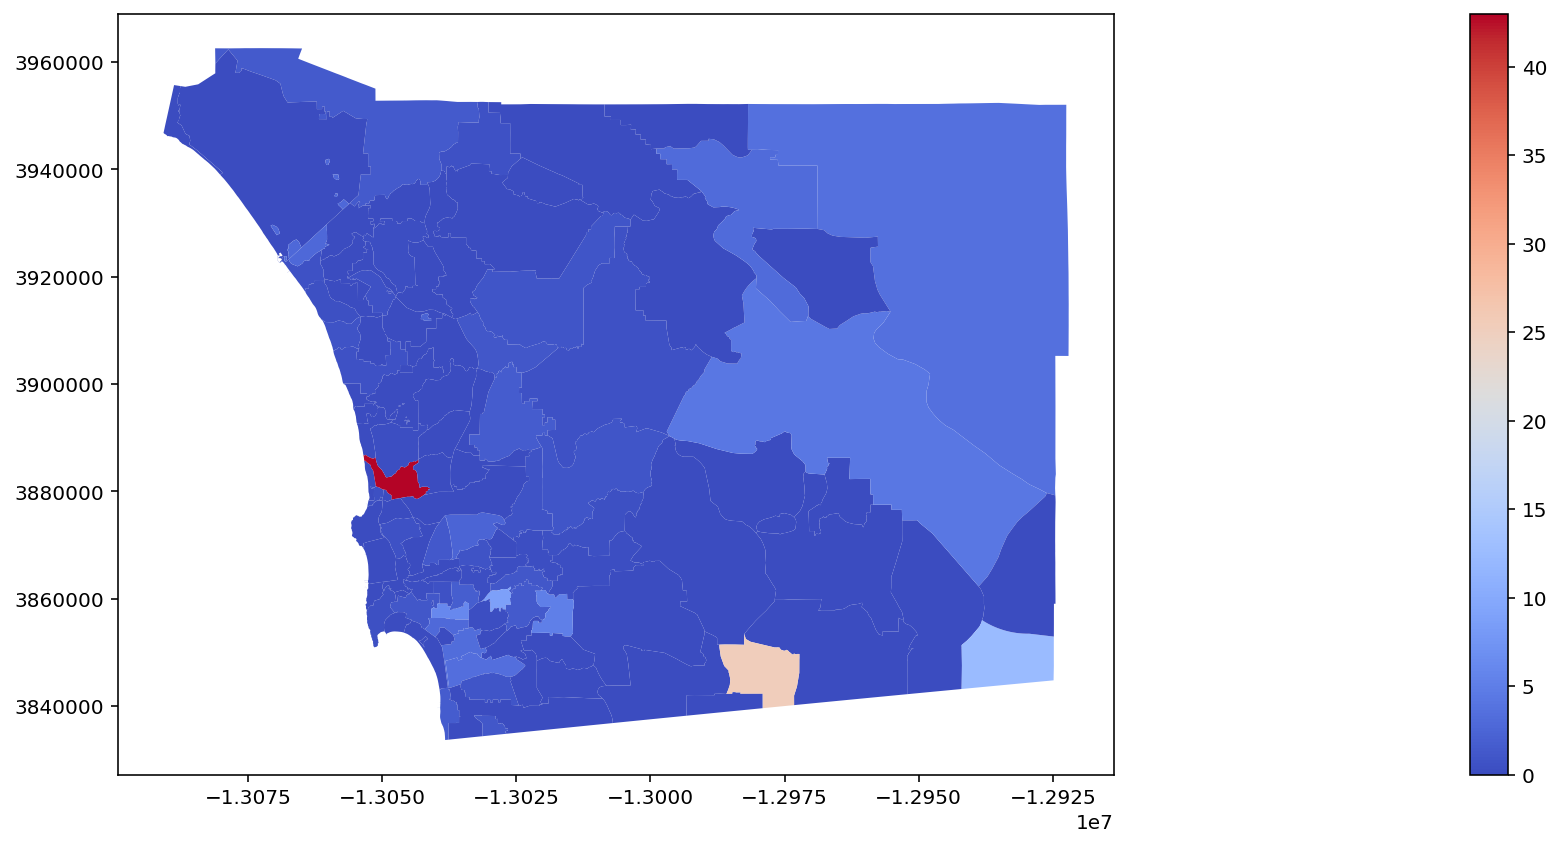

In [60]:
sdmapJan2020 = pd.merge(tempmap, adjusted_df_jan2020, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapJan2020['food_distributed'].fillna(0, inplace = True)
sdmapJan2020['POPULATION'].fillna(0, inplace = True)
sdmapJan2020['ratio'].fillna(0, inplace = True)

sdmapJan2020
sdmapJan2020.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapJan2020['ratio'].mean()
sdmapJan2020[sdmapJan2020['ratio'] > 4]

In January 2020, there continues to be a significant amount of food distributed near campus in Sorrento Valley. Even accounting for all forms of housing in that zip code, it is still a significant outlier. 

More food was distributed in Jacumba, 12.345018 compared to last years value of 9.574723.

More food was distributed in Portero as well. The ratio increased from 17.881930 to 25.280287.

Food distribution decreased in Spring Valley and in Warner Springs. 
91945, Lemon Grove, now appears as one of the top values. Lemon Grove is a majority latinx community, Latinx individuals of any race were 11,635 persons, (45.2% of the total population), as of the 2010 Census.

Food is distributed in the community of Julian. 

We see now that a greater amount of food is being distributed in communities adjacent to downtown, specifically in 92102 - associated with South Park, Golden Hills, Grant Hill, Sherman Heights, Mt Hope, Chollas View, and Ridgeview/Webster neighborhoods.
Some facts about this community according to https://www.zipdatamaps.com/92102 :
* Racial Majority:	Latinx 0.55%
* Public School Racial Majority:	Latinx 73.9%
* Unemployment Rate:	3.9%
* Median Household Income $31791

In [59]:
#FEB 2020
adjusted_df_feb2020 = pd.merge(df_feb2020, pop, on='ZIP', how='left')
#adjusted_df_feb2020.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_feb2020[adjusted_df_feb2020['POPULATION']==0]
#adjusted_df_feb2020 = adjusted_df_feb2020[adjusted_df_feb2020['POPULATION'] != 0]
adjusted_df_feb2020 = adjusted_df_feb2020.assign(ratio = adjusted_df_feb2020['food_distributed'] / adjusted_df_feb2020['POPULATION'])
adjusted_df_feb2020

,ZIP,food_distributed,POPULATION,ratio
0,91945,180749,26834,6.73582
1,92025,40046,51509,0.777456
2,92028,53388,48274,1.10594
3,91910,119257,82682,1.44236
4,92103,14880,38879,0.382726
...,...,...,...,...
57,92008,4877,29396,0.165907
58,92130,2522,59436,0.0424322
59,91934,10312,1084,9.51292
60,91963,19628,974,20.152


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",10312,1084.0,9.512915
17,18,91945,Lemon Grove,1.075111e+08,63900.790408,"POLYGON ((-13026105.370 3861775.451, -13026124...",180749,26834.0,6.735820
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",19628,974.0,20.151951
79,80,92096,San Marcos,1.352350e+07,17574.076583,"POLYGON ((-13041548.056 3913190.413, -13041547...",3923,566.0,6.931095
81,82,92102,San Diego,1.258094e+08,63075.690764,"POLYGON ((-13034474.579 3859470.788, -13034431...",209531,42951.0,4.878373
99,100,92121,San Diego,3.387185e+08,117747.270174,"POLYGON ((-13052938.066 3886694.600, -13052892...",177922,4796.0,37.097998


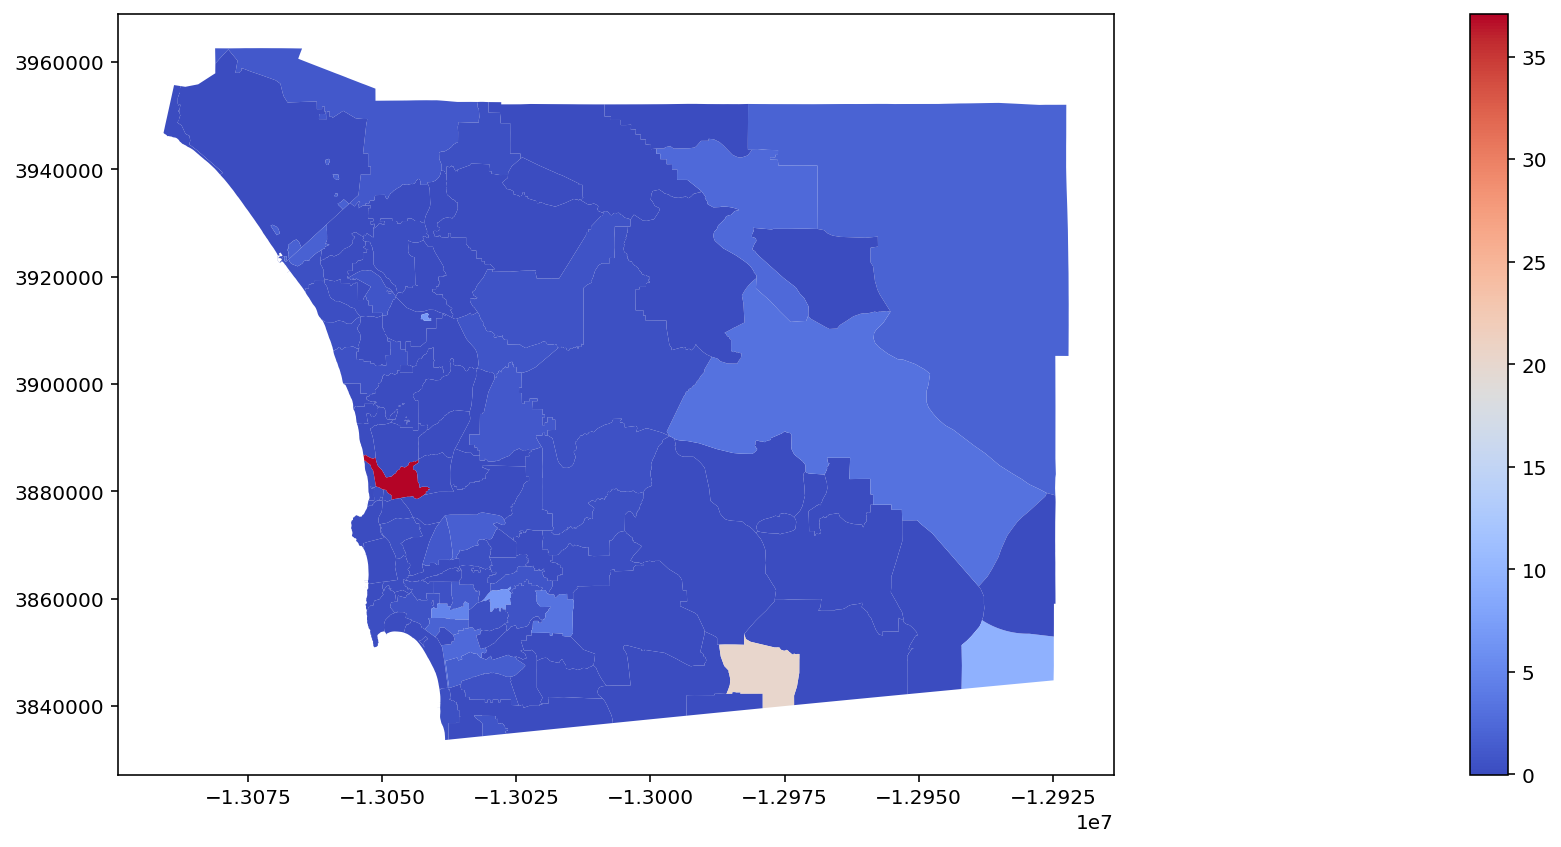

In [61]:
sdmapFeb2020 = pd.merge(tempmap, adjusted_df_feb2020, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapFeb2020['food_distributed'].fillna(0, inplace = True)
sdmapFeb2020['POPULATION'].fillna(0, inplace = True)
sdmapFeb2020['ratio'].fillna(0, inplace = True)

sdmapFeb2020
sdmapFeb2020.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapFeb2020['ratio'].mean()
sdmapFeb2020[sdmapFeb2020['ratio'] > 4]

Compared to February 2019, in February 2020:
* More food distributed in Jacumba, 9.51 compared to 5.12 last year.
* Slighlty less distributed in Lemon Grave compared to last year.
* Significantly more food being distributed in Potrero - 20.15 compared to 8.32 in the same time last year.

In [62]:
#Mar 2020
adjusted_df_mar2020 = pd.merge(df_mar2020, pop, on='ZIP', how='left')
#adjusted_df_mar2020.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_mar2020[adjusted_df_mar2020['POPULATION']==0]
#adjusted_df_mar2020 = adjusted_df_mar2020[adjusted_df_mar2020['POPULATION'] != 0]
adjusted_df_mar2020 = adjusted_df_mar2020.assign(ratio = adjusted_df_mar2020['food_distributed'] / adjusted_df_mar2020['POPULATION'])
adjusted_df_mar2020

,ZIP,food_distributed,POPULATION,ratio
0,91945,295729,26834,11.0207
1,92025,64474,51509,1.2517
2,92028,64665,48274,1.33954
3,91910,238448,82682,2.88392
4,92103,14608,38879,0.37573
...,...,...,...,...
57,92008,5863,29396,0.199449
58,92130,13061,59436,0.219749
59,91934,7947,1084,7.33118
60,91963,14088,974,14.4641


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",7947,1084.0,7.331181
17,18,91945,Lemon Grove,1.075111e+08,63900.790408,"POLYGON ((-13026105.370 3861775.451, -13026124...",295729,26834.0,11.020683
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",14088,974.0,14.464066
79,80,92096,San Marcos,1.352350e+07,17574.076583,"POLYGON ((-13041548.056 3913190.413, -13041547...",4871,566.0,8.606007
81,82,92102,San Diego,1.258094e+08,63075.690764,"POLYGON ((-13034474.579 3859470.788, -13034431...",222087,42951.0,5.170706
99,100,92121,San Diego,3.387185e+08,117747.270174,"POLYGON ((-13052938.066 3886694.600, -13052892...",146006,4796.0,30.443286


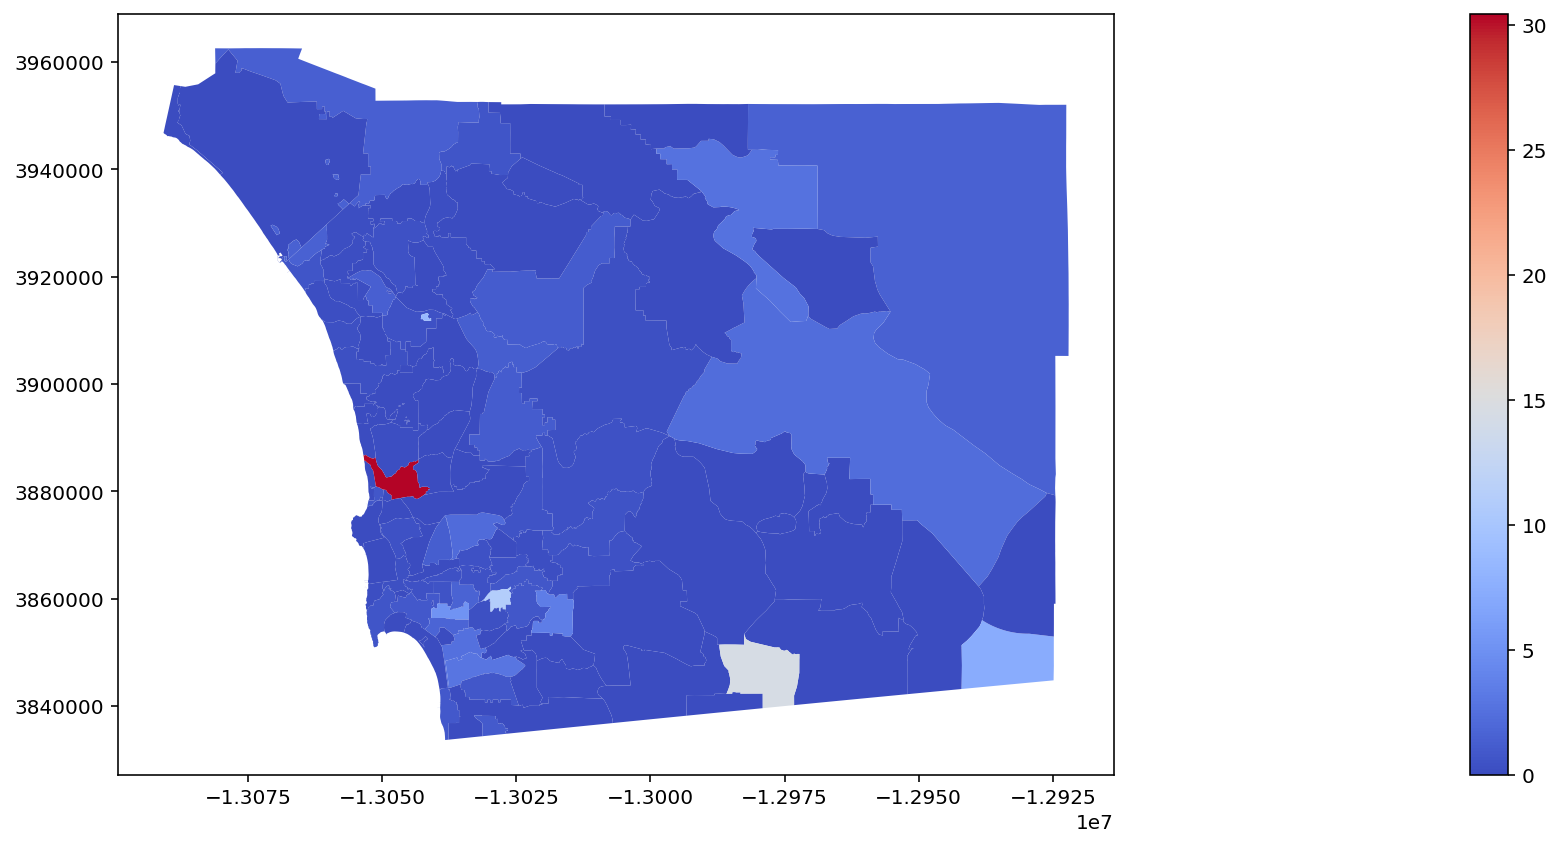

In [64]:
sdmapMar2020 = pd.merge(tempmap, adjusted_df_mar2020, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapMar2020['food_distributed'].fillna(0, inplace = True)
sdmapMar2020['POPULATION'].fillna(0, inplace = True)
sdmapMar2020['ratio'].fillna(0, inplace = True)

sdmapMar2020
sdmapMar2020.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
#
sdmapMar2020['ratio'].mean()
sdmapMar2020[sdmapMar2020['ratio'] > 4]

Mar 19, 2020 is when Governor Newsom issues the stay at home order.
* Distribution up in Jacumba compared to last year, from 5.6 to 7.3
* Distribution way up in Lemon Grove compared to last year - almost double.
* Distribution up in Jacumba compared to last year 7.3 compared to 5.6 last year
* Distribution up in Potrero compared to last year, 14.5 compared to 8 last year.
* Distribution in Sorrento Valley sky rockets.
* Distribution higher in San Marcos and 92102.

In [65]:
#Apr 2020
adjusted_df_apr2020 = pd.merge(df_apr2020, pop, on='ZIP', how='left')
#adjusted_df_apr2020.drop(['YEAR', 'HOUSING TYPE'], axis=1, inplace=True)
#adjusted_df_apr2020[adjusted_df_apr2020['POPULATION']==0]
#adjusted_df_apr2020 = adjusted_df_apr2020[adjusted_df_apr2020['POPULATION'] != 0]
adjusted_df_apr2020 = adjusted_df_apr2020.assign(ratio = adjusted_df_apr2020['food_distributed'] / adjusted_df_apr2020['POPULATION'])
adjusted_df_apr2020

,ZIP,food_distributed,POPULATION,ratio
0,91945,439731,26834,16.3871
1,92025,87784,51509,1.70425
2,92028,63965,48274,1.32504
3,91910,182036,82682,2.20164
4,92103,36895,38879,0.94897
...,...,...,...,...
57,92008,6503,29396,0.221221
58,92130,120598,59436,2.02904
59,91934,7798,1084,7.19373
60,91963,21156,974,21.7207


,OBJECTID,ZIP,COMMUNITY,ShapeSTAre,ShapeSTLen,geometry,food_distributed,POPULATION,ratio
13,14,91934,Jacumba,1.275406e+09,147932.241794,"POLYGON ((-12924833.799 3852922.168, -12924836...",7798,1084.0,7.193727
17,18,91945,Lemon Grove,1.075111e+08,63900.790408,"POLYGON ((-13026105.370 3861775.451, -13026124...",439731,26834.0,16.387084
21,22,91963,Potrero,1.021953e+09,149748.072371,"POLYGON ((-12979115.741 3839577.112, -12979122...",21156,974.0,21.720739
42,43,92036,Julian,1.148784e+10,658532.621301,"POLYGON ((-12975898.170 3913541.738, -12973884...",87133,4346.0,20.049011
71,72,92081,Vista,2.451515e+08,95933.870905,"POLYGON ((-13052013.285 3921107.997, -13051983...",196977,32814.0,6.002834
79,80,92096,San Marcos,1.352350e+07,17574.076583,"POLYGON ((-13041548.056 3913190.413, -13041547...",2986,566.0,5.275618
81,82,92102,San Diego,1.258094e+08,63075.690764,"POLYGON ((-13034474.579 3859470.788, -13034431...",254664,42951.0,5.929175
99,100,92121,San Diego,3.387185e+08,117747.270174,"POLYGON ((-13052938.066 3886694.600, -13052892...",255271,4796.0,53.225813


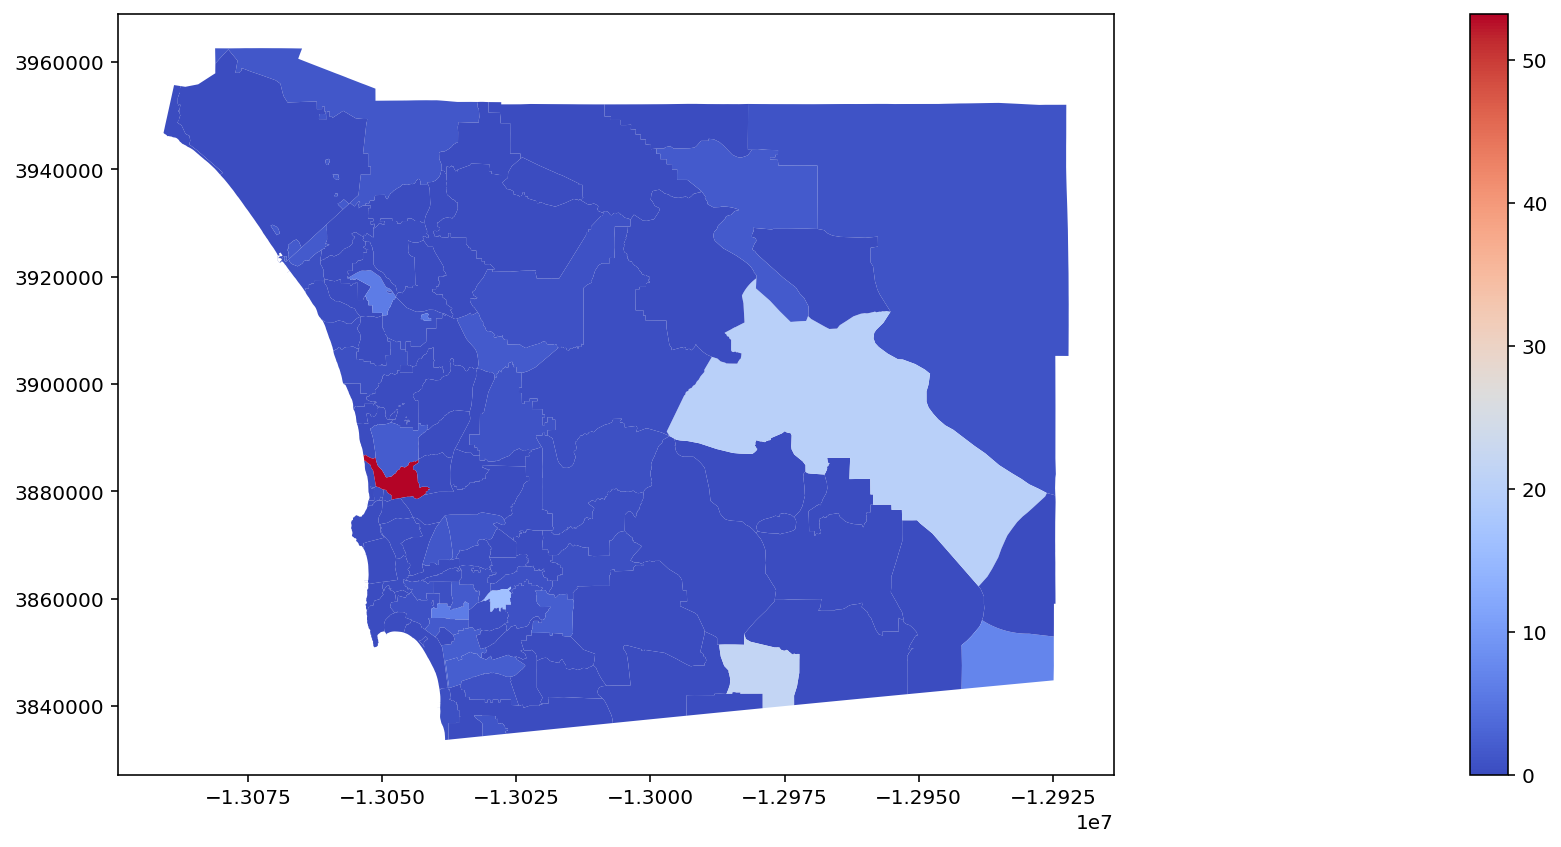

In [66]:
sdmapApr2020 = pd.merge(tempmap, adjusted_df_apr2020, on='ZIP', how='left')

fig, ax = plt.subplots(1, 1, figsize=(17, 7))
divider = make_axes_locatable(ax)
#sdmapJan2019.dropna()
sdmapApr2020['food_distributed'].fillna(0, inplace = True)
sdmapApr2020['POPULATION'].fillna(0, inplace = True)
sdmapApr2020['ratio'].fillna(0, inplace = True)

sdmapApr2020
sdmapApr2020.plot(column='ratio', ax=ax, cmap='coolwarm', legend=True)
# why is 92121 not the brightest color?
sdmapApr2020['ratio'].mean()
sdmapApr2020[sdmapApr2020['ratio'] > 4]


* Distribution in Jacumba has not significantly changed compared to last year.
* Distribution in Lemon Grove has significantly increased
* Distribution in Potero has remained the same
* Distrubtion in Julian, a rural community, has massively increased. https://en.wikipedia.org/wiki/Julian,_California
* Distribution in Vista has increased. https://en.wikipedia.org/wiki/Vista,_California
* Distribution in 92121 continues to increase massively, 50 lbs of food distributed per person.


In [ ]:
def standardize_address(string):
    #initialize return values
    addrnumber = ""
    addrunit = ""
    addrname = ""
    addrsfx = ""
    addrsuite = ""
    #modify string
    string = string.upper()
    temp = string
    string = string.split(" ", 1)

    #handle edge cases with unit numbers
    if "-" in string[0]:
        string[0].split("-", 1)
        addrnumber = float(string[0].split("-")[0])
        addrunit = float(string[0].split("-")[1])
    #Handle PO boxes
    elif ("PO" in string) or ("P.O." in string):
        print(string)
    else:
        addrnumber = float(string[0])
        
    string = string[1]
    
    #Split on comma
    if "," in string:
        string = string.rsplit(",", 1)
        addrsuite = string[1].strip()
        string = string[0]

    # Check for broadway
    AveSuffixes = [' Avenue', ' Ave', ' Ave.']
    DriveSuffixes = [' Drive', ' Dr', ' Dr.']
    StreetSuffixes = [' Street', ' St.', ' St']
    RoadSuffixes = [' Road', ' Rd']
    BoulevardSuffixes = [' Boulevard', ' Blvd']

    if 'BROADWAY' in string:
        for e in StreetSuffixes: # AND broadway not in e
             if (e.upper() in string):
                addrsfx = 'ST'
                string = string.split(e.upper(), 1)
        

    for e in AveSuffixes:
        if e.upper() in string:
            addrsfx = 'AVE'
            string = string.split(e.upper(), 1)

    for e in RoadSuffixes:
        if e.upper() in string:
            addrsfx = 'RD'
            string = string.split(e.upper(), 1)

    for e in StreetSuffixes: # AND broadway not in e
         if (e.upper() in string):
            addrsfx = 'ST'
            string = string.split(e.upper(), 1)

    for e in DriveSuffixes:
        if e.upper() in string:
            addrsfx = 'DR'
            string = string.split(e.upper(), 1)

    for e in BoulevardSuffixes:
        if e.upper() in string:
            addrsfx = 'BLVD'
            string = string.split(e.upper(), 1)

    if " LANE" in string:
        addrsfx = 'LN'
        string = string.split("LANE", 1)

    elif " WAY" in string:
        addrsfx = 'WAY'
        try:
            string = string.split("WAY", 1)
        except:
            print(temp)
            print(string)

    elif " GLEN" in string:
        addrsfx = 'GLEN'
        string = string.split("GLEN", 1)

    elif " PARKWAY" in string:
        addrsfx = "PKWY"
        string = string.split("PARKWAY", 1)

    elif " TRAIL" in string:
        addrsfx = "TRL"
        string = string.split("TRAIL", 1)

    elif " CIRCLE" in string:
        addrsfx = "CIR"
        string = string.split("CIRCLE", 1)

    elif " TERRACE" in string:
        addrsfx = "TER"
        string = string.split("TERRACE", 1)

    elif " PLACE" in string:
        addrsfx = "PL"
        string = string.split("PLACE", 1)

    elif " PARK" in string:
        addrsfx = "PARK"
        string = string.split("PARK", 1)

    elif "COURT" in string:
        addrsfx = "CT"
        string = string.split("COURT", 1)

    elif " ROUTE" in string:
        addrsfx = "RTE" # Try RT if this doesn't work
        string = string.split("ROUTE", 1)
    
    if type(string) == str:
        addrname = string.strip()
    else:
        addrname = string[0].strip()

    #print(addrname)

    return addrnumber, addrunit, addrname, addrsfx, addrsuite

In [ ]:
# Edge cases:
# Broadway fails because way is in Broadway. Need to check for "Broadway" first. Note, broadway has no suffix
# Pentecost addresss fails because st in pentecost
# According to Andy Gordon, GIS analyst at SANDAG, the points in the Address_APN data set do not include PO Boxes.
#df = pd.DataFrame(columns=addresses.columns)
#for e in col['STREET ADDRESS']:
#    try:
#        ANUM, AU, AD, SF, STE = standardize_address(e)
#        #print(ANUM, AU, AD, SF, STE)
#        df = df.append(addresses[(addresses['ADDRNMBR'] == ANUM) & (addresses['ADDRNAME'] == AD) & (addresses['ADDRSFX'] == SF)])
#    except:
#        print(e)


In [ ]:
#Not all addresses in the food bank data appeared in the addresses data set, so we'll have to work with what we've got.

In [ ]:
#df.duplicated(['ADDRNMBR', 'ADDRNAME', 'ADDRSFX'])